<a href="https://colab.research.google.com/github/petkovikjandrej/geospatial_analysis_of_tweets/blob/master/%D0%92%D0%9D%D0%9F_Geographical_Distribution_of_LongCOVID_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import re
import nltk
import spacy

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/lc2021.csv')

In [ ]:
data

,Date,User,Tweets
0,2021-06-29 23:59:21+00:00,Aineemac82,@1976vintage @sstroschein2 @Parents_Utd @Dmodo...
1,2021-06-29 23:58:59+00:00,SerpinaLonghaul,Very useful guidelines for maintaining indoor ...
2,2021-06-29 23:58:23+00:00,SusannahMcCon,"@Rat_Licker1984 With their 'long"" covid"
3,2021-06-29 23:57:42+00:00,MTOakman,@ThomasO62593131 @rekhuli @GrooveLocked88 @ber...
4,2021-06-29 23:56:12+00:00,rrp454,@jimmywalks2 @janemor50334582 @FinancialPopper...
...,...,...,...
823422,2021-10-01 00:03:00+00:00,TIME,Can breakthrough infections lead to long COVID...
823423,2021-10-01 00:02:06+00:00,nadine_bonnett,@SeenAndForeseen @GermHunterMD You’re making t...
823424,2021-10-01 00:01:09+00:00,barbvee,@White_Gold_Lith @VicGovDH All blame is on #Sc...
823425,2021-10-01 00:01:00+00:00,GameifiedSchool,"#games4ed\nHello, I'm Eric. \nIt's Friday morn..."


In [ ]:
#removing rows with missing values
data = data.dropna(subset=['Tweets'])

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

In [ ]:
def clean_tweet(tweet):
  tweet = tweet.lower()
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet)
  tweet = re.sub('@[^\s]+', '', tweet)
  tweet = re.sub('[^a-zA-Z0-9 \n\.]', '', tweet)
  tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
  return tweet

In [ ]:
def extract_locations(texts):
  locations = []
  for doc in nlp.pipe(texts, disable=["tagger", "parser"]):
    locations.append([ent.text for ent in doc.ents if ent.label_ == 'GPE'])
  return locations

In [ ]:
data['Cleaned Tweets'] = data['Tweets'].apply(clean_tweet)

<ipython-input-11-65df4cdde51e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned Tweets'] = data['Tweets'].apply(clean_tweet)


In [ ]:
data['Cleaned Tweets']

0         many wont agree testing unless made compulsory...
1         useful guidelines maintaining indoor air quali...
2                                                long covid
3         quite right natural immunity answer wouldnt ne...
4          covid deaths part issue. long covid big problem.
                                ...                        
823421    money tiny trex arms. long covid symptoms. cen...
823422    breakthrough infections lead long covid unluck...
823423    youre making assumption covid caught once. die...
823424    blame scottythebackstabber totally failed proc...
823425    games4ed hello im eric. friday morning vietnam...
Name: Cleaned Tweets, Length: 823426, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['Tokens'] = data['Cleaned Tweets'].apply(word_tokenize)

<ipython-input-14-8e40b90015a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tokens'] = data['Cleaned Tweets'].apply(word_tokenize)


In [ ]:
data['Locations'] = extract_locations(data['Cleaned Tweets'])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
<ipython-input-15-46b958814281>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Locations'] = extract_locations(data['Cleaned Tweets'])


In [ ]:
data['Locations']

0                []
1                []
2                []
3                []
4                []
            ...    
823421           []
823422           []
823423           []
823424           []
823425    [vietnam]
Name: Locations, Length: 823426, dtype: object

In [ ]:
data = data[data['Locations'].apply(lambda x: len(x) > 0)]

In [ ]:
data = data.drop(columns=['Tokens'])
data

,Date,User,Tweets,Cleaned Tweets,Locations
18,2021-06-29 23:48:35+00:00,OnlyEnnui,We all need to get behind this. Better still @...,need get behind this. better still amp clinica...,[longcovid mecfs]
27,2021-06-29 23:41:32+00:00,Aloe9678,@DS27891890 @LKsham22 @GregStohr The United St...,united states lost 604k people covid thousands...,[united states]
70,2021-06-29 23:12:23+00:00,JoeManna,"@ousuckss @ChuckGoat1 @Garrett_Archer Plenty, ...",plenty unnecessary people get vaccine wont nee...,[e.d.]
126,2021-06-29 22:36:09+00:00,SbrCraftmylife,@ProfColinDavis @Helen_biochem Long covid and ...,long covid post viral illnesses real potential...,[m.e.]
144,2021-06-29 22:27:22+00:00,laneymargolis,@Bill84187288 @epi_michael @syramadad Many of ...,many people testing positive israel vaccinated...,[israel]
...,...,...,...,...,...
823335,2021-10-01 01:25:09+00:00,RamblingMyMind,@cbk5117 @SenRickScott @marcorubio @SecBecerra...,people got vaccinated wouldnt need treatments ...,[florida]
823375,2021-10-01 00:44:21+00:00,BaryonicBeing,"Thread on MECFS and, likely, some aspects of l...",thread mecfs likely aspects long covid caused ...,[thread mecfs]
823388,2021-10-01 00:30:53+00:00,TheodoreGalanos,@blhdiscord @alonzosteven89 @BlameloveSZN @woj...,exclude millions suffer long covid. also where...,[110k]
823417,2021-10-01 00:09:05+00:00,MerlinofCanada,So #Alberta you are F#cked there will be no #F...,alberta fcked firebreak kenney let many die ge...,[alberta]


In [ ]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
def geocode_location(location):
  try:
    geolocator = Nominatim(user_agent='geoapiExcercises')
    location_result = geolocator.geocode(location, timeout=5)
    if location_result:
      return Point(location_result.longitude, location_result.latitude)
    else:
      return None
  except Exception as e:
    print(f"Error occured with location {location}: {e}")
    return None

In [ ]:
data['Geometry'] = data['Locations'].apply(lambda x: geocode_location(x[0]) if x else None)

Error occured with location b1617.2: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=b1617.2&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5)"))


Error occured with location b1.1.7: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=b1.1.7&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5)"))


Error occured with location b1.1.7: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=b1.1.7&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5)"))


Error occured with location b135.1: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=b135.1&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5)"))


In [ ]:
data = data.dropna(subset=['Geometry'])

In [ ]:
gdf = gpd.GeoDataFrame(data, geometry='Geometry', crs='EPSG:4326')

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-24-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


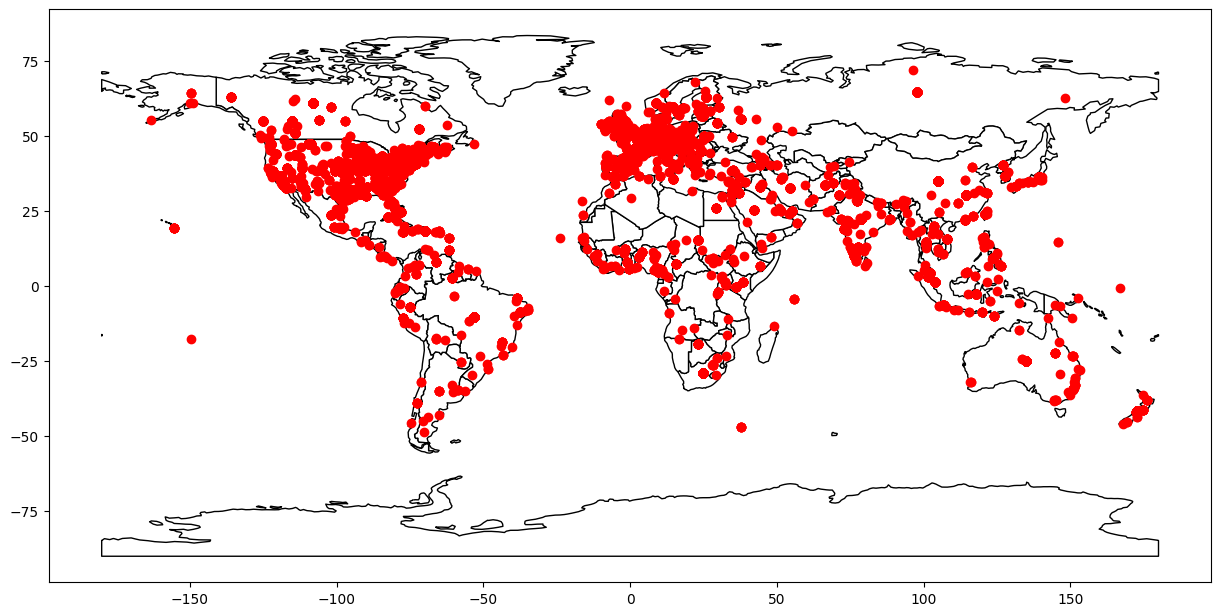

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import numpy as np

In [ ]:
gdf = gdf.to_crs('EPSG:3857')

In [ ]:
coords = gdf['Geometry'].map(lambda point: [point.y, point.x]).to_list()
coords = np.array(coords)

In [ ]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

In [ ]:
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [ ]:
import matplotlib.colors as colors

In [ ]:
gdf['cluster'] = db.labels_

In [ ]:
fig, ax = plt.subplots(figsize=(100, 250))  # You can adjust the size as per your preference

world.to_crs(epsg=3857).plot(ax=ax, color='white', edgecolor='black')

cmap = plt.cm.get_cmap('tab20', np.max(gdf['cluster']) + 1)

# Plot clusters
gdf.plot(column='cluster',
         cmap=cmap,
         markersize=100,   # Adjust the marker size as per your preference
         ax=ax,
         legend=True,
         legend_kwds={'label': "Cluster ID",
                      'orientation': "horizontal"})

ax.set_title('Geographical Distribution of #LongCovid Tweets', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

plt.show()

<ipython-input-37-e6f8bab58a13>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', np.max(gdf['cluster']) + 1)
